In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movie  = pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
movie.shape

(10, 15)

In [6]:
#Replacing NaN values with 0
movie.fillna(0)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


<AxesSubplot:>

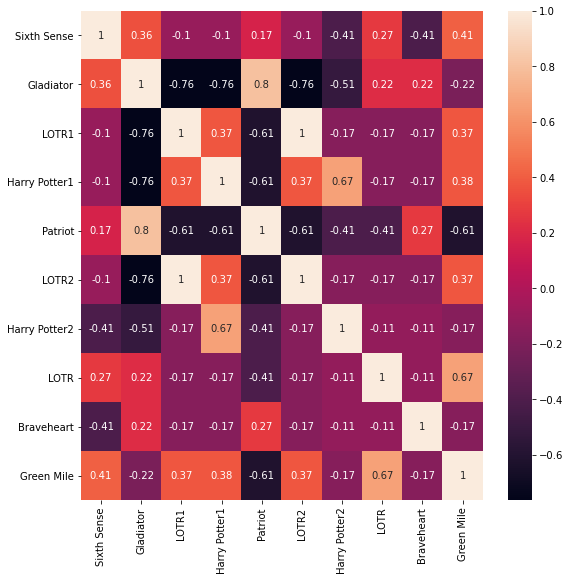

In [7]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(movie.corr(), annot=True)

## 1st method

In [8]:
#Consider only first 5 columns [V1,V2,V3,V4,V5]
movie_names = movie.iloc[:,:5]

In [9]:
movie_names

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [10]:
movie_names.fillna(0)

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,0,0
2,LOTR1,LOTR2,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0
4,Gladiator,Patriot,Sixth Sense,0,0
5,Gladiator,Patriot,Sixth Sense,0,0
6,Harry Potter1,Harry Potter2,0,0,0
7,Gladiator,Patriot,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0


In [11]:
len(movie_names)

10

In [12]:
#Dummy variables
movies_names = pd.get_dummies(movie_names)
movies_names

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [13]:
movies_names.shape

(10, 15)

In [14]:
movie_names.describe()

,V1,V2,V3,V4,V5
count,10,10,7,2,1
unique,4,5,4,1,1
top,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2
freq,6,6,4,2,1


In [15]:
movies_names.sum()

V1_Gladiator        6
V1_Harry Potter1    1
V1_LOTR1            1
V1_Sixth Sense      2
V2_Harry Potter2    1
V2_LOTR             1
V2_LOTR1            1
V2_LOTR2            1
V2_Patriot          6
V3_Braveheart       1
V3_Gladiator        1
V3_Harry Potter1    1
V3_Sixth Sense      4
V4_Green Mile       2
V5_LOTR2            1
dtype: int64

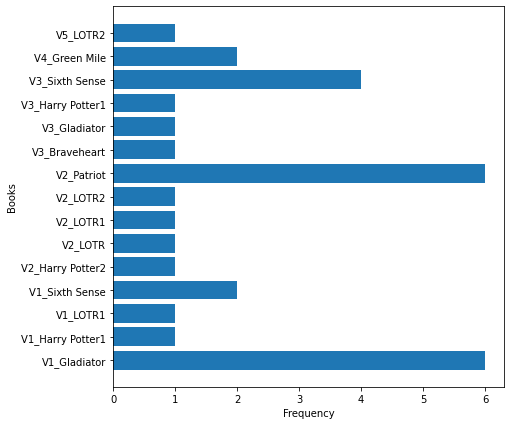

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
plt.barh(movies_names.columns ,movies_names.sum())
plt.ylabel("Books")
plt.xlabel("Frequency")
plt.show()

# Apriori Algorithm

### 10% Support 

In [17]:
#Maximum length = 4
frequent_itemsets1 = apriori(movies_names, min_support=0.1, max_len=4, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(V1_Gladiator)
1,0.1,(V1_Harry Potter1)
2,0.1,(V1_LOTR1)
3,0.2,(V1_Sixth Sense)
4,0.1,(V2_Harry Potter2)
5,0.1,(V2_LOTR)
6,0.1,(V2_LOTR1)
7,0.1,(V2_LOTR2)
8,0.6,(V2_Patriot)
9,0.1,(V3_Braveheart)


In [18]:
rules1 = association_rules(frequent_itemsets1, metric='lift', min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V1_Gladiator),(V3_Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
3,(V3_Braveheart),(V1_Gladiator),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
4,(V3_Sixth Sense),(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
219,"(V5_LOTR2, V4_Green Mile)","(V2_LOTR1, V3_Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
220,(V2_LOTR1),"(V5_LOTR2, V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,(V3_Harry Potter1),"(V2_LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
222,(V4_Green Mile),"(V2_LOTR1, V3_Harry Potter1, V5_LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [19]:
rules1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
223,(V5_LOTR2),"(V2_LOTR1, V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
61,(V2_LOTR),"(V3_Gladiator, V1_Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
151,(V3_Gladiator),"(V4_Green Mile, V1_Sixth Sense, V2_LOTR)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
153,(V2_LOTR),"(V4_Green Mile, V3_Gladiator, V1_Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
156,"(V2_LOTR1, V4_Green Mile, V1_Sixth Sense)",(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
35,(V2_Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
48,(V2_Patriot),"(V1_Gladiator, V3_Braveheart)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
47,(V1_Gladiator),"(V2_Patriot, V3_Braveheart)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
46,"(V2_Patriot, V3_Braveheart)",(V1_Gladiator),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


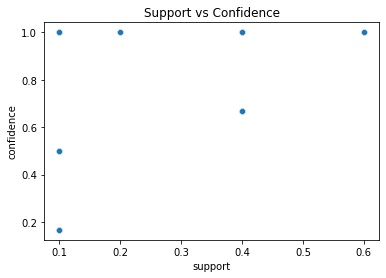

In [20]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 20% Support 

In [21]:
#Maximum length = 3
frequent_itemsets2 = apriori(movies_names, min_support=0.2, max_len=3, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(V1_Gladiator)
1,0.2,(V1_Sixth Sense)
2,0.6,(V2_Patriot)
3,0.4,(V3_Sixth Sense)
4,0.2,(V4_Green Mile)
5,0.6,"(V1_Gladiator, V2_Patriot)"
6,0.4,"(V3_Sixth Sense, V1_Gladiator)"
7,0.2,"(V4_Green Mile, V1_Sixth Sense)"
8,0.4,"(V3_Sixth Sense, V2_Patriot)"
9,0.4,"(V3_Sixth Sense, V1_Gladiator, V2_Patriot)"


In [22]:
rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V3_Sixth Sense),(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(V1_Gladiator),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
4,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(V3_Sixth Sense),(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
7,(V2_Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
8,"(V3_Sixth Sense, V1_Gladiator)",(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
9,"(V3_Sixth Sense, V2_Patriot)",(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf


In [23]:
rules2.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V3_Sixth Sense),(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(V1_Gladiator),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6,(V3_Sixth Sense),(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
7,(V2_Patriot),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
8,"(V3_Sixth Sense, V1_Gladiator)",(V2_Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
9,"(V3_Sixth Sense, V2_Patriot)",(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf


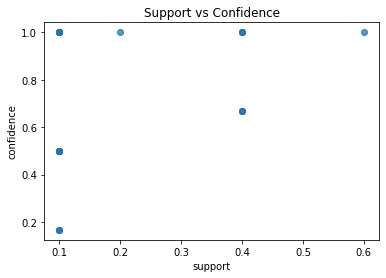

In [24]:
plt.scatter(x=rules1['support'],y=rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

## 2nd Method

In [25]:
#Drop the columns [V1,V2,V3,V4,V5]
movie = movie.iloc[:,5:]
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [26]:
movie.shape

(10, 10)

In [27]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
movie.sum()

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

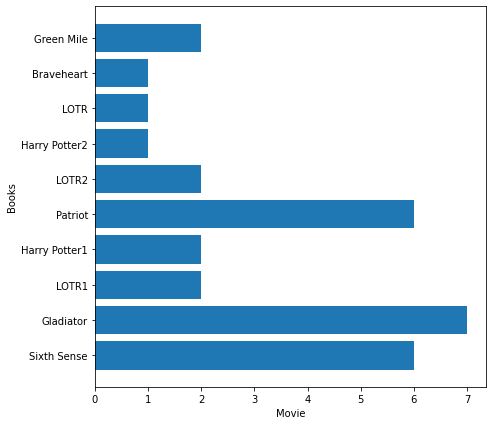

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
plt.barh(movie.columns ,movie.sum())
plt.ylabel("Books")
plt.xlabel("Movie")
plt.show()

# Apriori Algorithm

### 10% Support 

In [30]:
#Maximum length = 4
frequent_itemsets1 = apriori(movie, min_support=0.1, max_len=4, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [31]:
rules1 = association_rules(frequent_itemsets1, metric='lift', min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
203,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
204,(Harry Potter1),"(LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
205,(LOTR1),"(Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
206,(Green Mile),"(Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [32]:
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
145,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
157,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
171,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
174,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
175,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


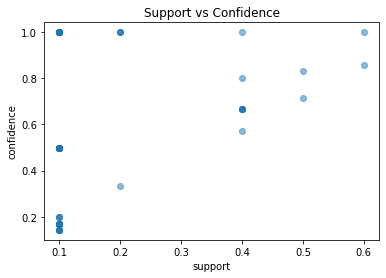

In [33]:
plt.scatter(x=rules1['support'],y=rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### 20% Support

In [34]:
#Maximum length = 3
frequent_itemsets2 = apriori(movie, min_support=0.2, max_len=3, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [35]:
rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [36]:
rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
14,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
13,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


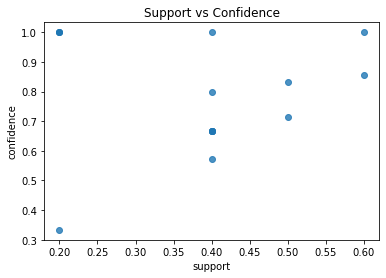

In [39]:
plt.scatter(x=rules2['support'],y=rules2['confidence'], alpha=0.8)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()